Laura is running this code locally, please talk to me before modifying


# Framework

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
%pip install emoji

Defaulting to user installation because normal site-packages is not writeable
   -------------------------------------- 397.5/397.5 kB 266.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#%pip install git+https://github.com/phatpiglet/autocorrect.git

In [2]:
%pip install textblob

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 636.8/636.8 kB 221.5 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 214.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
#%pip install scikit-learn

In [4]:
%pip install datasets

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 521.2/521.2 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 115.3/115.3 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 364.8/364.8 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 24.6/24.6 MB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 135.4/135.4 kB ? eta 0:00:00
   ---------------------------------------- 50.5/50.5 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 76.7/76.7 kB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
#%pip install transformers

In [5]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW, DistilBertConfig
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import emoji
import matplotlib.pyplot as plt
from datasets import load_metric
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score, recall_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import ParameterGrid
from torch.nn.utils.rnn import pad_sequence

# Data Exploration

In [9]:
# Load dataset
hatespeech_train = pd.read_csv('hatespeech_train.csv')

# Display the first few rows of the dataset
print(hatespeech_train.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [10]:
# Check the exact name of your label column
label_column_name = 'label'  # Replace with the actual name

# Calculate EDA metrics on Label
label_stats = hatespeech_train[label_column_name].describe()

# Calculate additional metrics
label_stats['mean'] = hatespeech_train[label_column_name].mean()
label_stats['median'] = hatespeech_train[label_column_name].median()
label_stats['std_dev'] = hatespeech_train[label_column_name].std()
label_stats['skewness'] = hatespeech_train[label_column_name].skew()

# Display the calculated metrics
print(label_stats)

count       31962.000000
mean            0.070146
std             0.255397
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max             1.000000
median          0.000000
std_dev         0.255397
skewness        3.366381
Name: label, dtype: float64


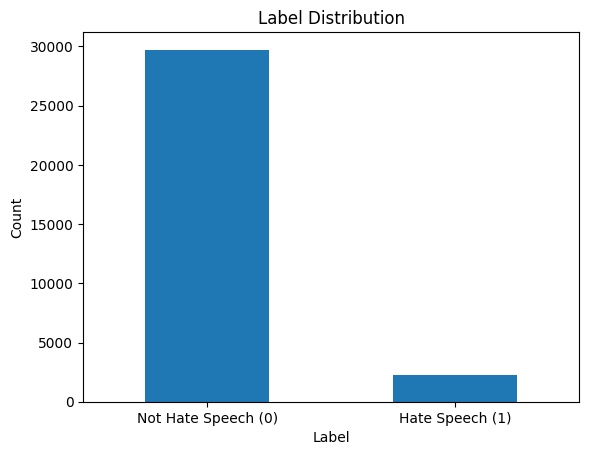

In [11]:
# Plot label
hatespeech_train[label_column_name].value_counts().plot(kind='bar', title='Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Hate Speech (0)', 'Hate Speech (1)'], rotation=0)
plt.show()

# Data Pre-Processing

In [18]:
#Dataset Definition
twits_25k_path = '25k_dataset.csv'
twits_32k_path = 'hatespeech_train.csv'
twits_150_path = 

twits_25k = pd.read_csv(twits_25k_path)
twits_32k = pd.read_csv(twits_32k_path)

NameError: name 'file_path' is not defined

In [14]:
import pandas as pd
from textblob import TextBlob
import emoji
import re

def preprocess_dataset(file_path):
    # Load dataset
    dataset = pd.read_csv(file_path)
    # Change text to lowercase
    dataset['tweet'] = dataset['tweet'].str.lower()
    # Eliminate URLs
    dataset['tweet'] = dataset['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
    # Use TextBlob for spelling correction
    dataset['tweet'] = dataset['tweet'].apply(lambda x: str(TextBlob(x).correct()))
    # Convert emojis to text and keep sentiment
    dataset['tweet'] = dataset['tweet'].apply(lambda x: emoji.demojize(x))
    # Keep hashtags
    dataset['tweet'] = dataset['tweet'].apply(lambda x: re.sub(r'#', '', x))
    # Eliminate @mentions
    dataset['tweet'] = dataset['tweet'].replace(r'@\S+', '', regex=True)
    return dataset

# Uso de la función con tu ruta de archivo
hatespeech_train_preprocessed = preprocess_dataset('hatespeech_train.csv')

# Muestra las primeras filas del DataFrame resultante
print(hatespeech_train_preprocessed.head())


KeyboardInterrupt: 

In [15]:
# Load dataset
hatespeech_train = pd.read_csv('hatespeech_train.csv')

# Display the first few rows of the dataset
print(hatespeech_train.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [16]:
# Change text to lowercase
hatespeech_train['tweet'] = hatespeech_train['tweet'].str.lower()

# Eliminate URLs
hatespeech_train['tweet'] = hatespeech_train['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)


In [17]:
# Use TextBlob for spelling correction
hatespeech_train['tweet'] = hatespeech_train['tweet'].apply(lambda x: str(TextBlob(x).correct()))

KeyboardInterrupt: 

In [ ]:
# Convert emojis to text and keep sentiment
hatespeech_train['tweet'] = hatespeech_train['tweet'].apply(lambda x: emoji.demojize(x))

In [ ]:
# Keep hashtags
hatespeech_train['tweet'] = hatespeech_train['tweet'].apply(lambda x: re.sub(r'#', '', x))

In [ ]:
# Eliminate @mentions
hatespeech_train['tweet'] = hatespeech_train['tweet'].replace(r'@\S+', '', regex=True)

In [ ]:
hatespeech_train.head()

In [ ]:
# Save the prepared DataFrame to a CSV file
hatespeech_train.to_csv('/Users/lauraguinandrodriguez/Desktop/Hate Speech/prepared_hatespeech_train.csv', index=False)

print(f"Prepared data saved to {'/Users/lauraguinandrodriguez/Desktop/Hate Speech/prepared_hatespeech_train.csv'}")

Train and Test Split

In [ ]:
# Split the dataset into train (80%) and test (20%)
train_df, test_df = train_test_split(hatespeech_train, test_size=0.2, random_state=42)

# Display the first few rows of the preprocessed dataset
print(train_df.head())
print(test_df.head())

In [ ]:
# Save train and test datasets to CSV files
train_df.to_csv('train_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

# DistilBERT Pre-trained Model

## Load Train and Test Datasets

Issues with tokenization made in the data preparation so they were implemented below in the cell that runs the model. 
To reduce time, droped Tokens column when calling the current saved csv and re-ran the tokenization and label encoding below. 

In [4]:
# Load dataset
hatespeech_train = pd.read_csv('/Users/lauraguinandrodriguez/Desktop/Hate Speech/train_dataset.csv')

# Drop the 'Tokens' column
hatespeech_train = hatespeech_train.drop(columns=['Tokens'])

# Display the first few rows of the modified dataset
print(hatespeech_train.head())

      id  label                                              tweet
0  12111      1     because i've been paying attention for the ...
1  14082      0    raft building at salford quays as pa of the ...
2   1830      0  friday ðð» gdegblog friday selfie   beard...
3   2770      0                        fashion it is a true   fact
4  31819      0  so   to share the simple, elegant businesscard...


In [5]:
# Load dataset
hatespeech_test = pd.read_csv('/Users/lauraguinandrodriguez/Desktop/Hate Speech/test_dataset.csv')

# Drop the 'Tokens' column
hatespeech_test = hatespeech_test.drop(columns=['Tokens'])

# Display the first few rows of the modified dataset
print(hatespeech_test.head())

      id  label                                              tweet
0  12228      0    âmy mom says my smile is captivatingâ¦ i ...
1  14710      0  in 3 days i will be meeting my sis-n-law, coun...
2  19320      0  hating the conservative homophobes using this ...
3   4309      0  awee if this doesn't  scream   friday acewells...
4  24056      0   fathersday  fatherã¢ââs day god! ãâ« tony ...


## Tokenization, Label encoding, Hyperparameter Tunning, GridSearch, Evaluation

In [17]:
# Tokenization
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
hatespeech_train['Tokens'] = hatespeech_train['tweet'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
hatespeech_test['Tokens'] = hatespeech_test['tweet'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

# Label Encoding
label_encoder = LabelEncoder()
hatespeech_train['label'] = label_encoder.fit_transform(hatespeech_train['label'])
hatespeech_test['label'] = label_encoder.transform(hatespeech_test['label'])

# Padding sequences
token_tensors_train = [torch.tensor(token_ids) for token_ids in hatespeech_train['Tokens']]
token_tensors_test = [torch.tensor(token_ids) for token_ids in hatespeech_test['Tokens']]

padded_token_tensors_train = pad_sequence(token_tensors_train, batch_first=True, padding_value=0)
padded_token_tensors_test = pad_sequence(token_tensors_test, batch_first=True, padding_value=0)

# Create TensorDatasets
dataset_train = TensorDataset(padded_token_tensors_train, torch.tensor(hatespeech_train['label'].tolist()))
dataset_test = TensorDataset(padded_token_tensors_test, torch.tensor(hatespeech_test['label'].tolist()))

# Hyperparameter Grid Search
param_grid = {
    'learning_rate': [1e-5, 3e-5],
    'epochs': [3, 7],
    'batch_size': [16, 32]
}

best_accuracy = 0
best_hyperparameters = None
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# DataLoader instances for training and validation
train_dataloader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(dataset_test, batch_size=batch_size)

# Loop through hyperparameter combinations
for params in tqdm(list(ParameterGrid(param_grid))):
    model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased').to(device)
    optimizer = AdamW(model.parameters(), lr=params['learning_rate'])

    # Training loop
    for epoch in range(params['epochs']):
        model.train()
        total_loss = 0

        # Iterate over batches
        for batch in tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{params['epochs']}"):
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs, labels=labels)  # Specify labels during training
            loss = outputs.loss

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        # Calculate average training loss for the epoch
        average_loss = total_loss / len(train_dataloader)
        print(f"Epoch {epoch + 1}/{params['epochs']}, Average Training Loss: {average_loss}")

    # Evaluation (Move these lines outside the training loop)
    model.eval()
    with torch.no_grad():
        total_metrics = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
        total_samples = 0

        for val_batch in tqdm(validation_dataloader, desc=f"Evaluation"):
            val_inputs, val_labels = val_batch
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

            # Forward pass
            val_outputs = model(val_inputs)
            val_predictions = val_outputs.logits.argmax(dim=-1)

            # Update metrics
            total_metrics['accuracy'] += accuracy_score(val_labels.cpu(), val_predictions.cpu()) * len(val_labels)
            total_metrics['precision'] += precision_score(val_labels.cpu(), val_predictions.cpu(), average='weighted', zero_division=1.0) * len(val_labels)
            total_metrics['recall'] += recall_score(val_labels.cpu(), val_predictions.cpu(), average='weighted', zero_division=1.0) * len(val_labels)
            total_metrics['f1'] += f1_score(val_labels.cpu(), val_predictions.cpu(), average='weighted', zero_division=1.0) * len(val_labels)

            total_samples += len(val_labels)

        # Calculate average metrics for the epoch
        average_metrics = {key: total_metrics[key] / total_samples for key in total_metrics}
        print(f"Epoch {epoch + 1}/{params['epochs']}, Evaluation Metrics: {average_metrics}")

    # Check if current hyperparameters result in better accuracy
    if average_metrics['accuracy'] > best_accuracy:
        best_accuracy = average_metrics['accuracy']
        best_hyperparameters = params

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy)


  0%|          | 0/8 [00:00<?, ?it/s]Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3: 100%|██████████| 1599/1599 [26:55<00:00,  1.01s/it]


Epoch 1/3, Average Training Loss: 0.14391764020605516


Epoch 2/3: 100%|██████████| 1599/1599 [26:12<00:00,  1.02it/s]


Epoch 2/3, Average Training Loss: 0.0787716812729076


Epoch 3/3: 100%|██████████| 1599/1599 [26:14<00:00,  1.02it/s]


Epoch 3/3, Average Training Loss: 0.0424393708361173


 12%|█▎        | 1/8 [1:21:42<9:32:00, 4902.89s/it]

Epoch 3/3, Evaluation Metrics: {'accuracy': 0.9691850461442202, 'precision': 0.9768793735593353, 'recall': 0.9691850461442202, 'f1': 0.9694063770068169}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3: 100%|██████████| 1599/1599 [26:25<00:00,  1.01it/s]


Epoch 1/3, Average Training Loss: 0.14040649102194372


Epoch 2/3: 100%|██████████| 1599/1599 [26:25<00:00,  1.01it/s]


Epoch 2/3, Average Training Loss: 0.06679706694627428


Epoch 3/3: 100%|██████████| 1599/1599 [27:02<00:00,  1.01s/it]


Epoch 3/3, Average Training Loss: 0.02764650294274639


 25%|██▌       | 2/8 [2:43:56<8:12:05, 4920.99s/it]

Epoch 3/3, Evaluation Metrics: {'accuracy': 0.9679336774597216, 'precision': 0.973555146167769, 'recall': 0.9679336774597216, 'f1': 0.9640664405599851}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/7: 100%|██████████| 1599/1599 [28:07<00:00,  1.06s/it]


Epoch 1/7, Average Training Loss: 0.1476514573419249


Epoch 2/7: 100%|██████████| 1599/1599 [27:51<00:00,  1.05s/it]


Epoch 2/7, Average Training Loss: 0.08161305644904136


Epoch 3/7: 100%|██████████| 1599/1599 [26:22<00:00,  1.01it/s]


Epoch 3/7, Average Training Loss: 0.043992744816168376


Epoch 4/7: 100%|██████████| 1599/1599 [26:25<00:00,  1.01it/s]


Epoch 4/7, Average Training Loss: 0.0236165699850942


Epoch 5/7: 100%|██████████| 1599/1599 [1:08:41<00:00,  2.58s/it]


Epoch 5/7, Average Training Loss: 0.012458787496689525


Epoch 6/7: 100%|██████████| 1599/1599 [28:32<00:00,  1.07s/it]


Epoch 6/7, Average Training Loss: 0.007370539780636019


Epoch 7/7: 100%|██████████| 1599/1599 [27:12<00:00,  1.02s/it]


Epoch 7/7, Average Training Loss: 0.00764018472882054


 38%|███▊      | 3/8 [6:39:29<12:40:36, 9127.38s/it]

Epoch 7/7, Evaluation Metrics: {'accuracy': 0.9691850461442202, 'precision': 0.9776568021112829, 'recall': 0.9691850461442202, 'f1': 0.9694383291419922}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/7: 100%|██████████| 1599/1599 [26:28<00:00,  1.01it/s]


Epoch 1/7, Average Training Loss: 0.1338973154354342


Epoch 2/7: 100%|██████████| 1599/1599 [26:30<00:00,  1.01it/s]


Epoch 2/7, Average Training Loss: 0.06127012667359447


Epoch 3/7: 100%|██████████| 1599/1599 [26:39<00:00,  1.00s/it]


Epoch 3/7, Average Training Loss: 0.02782008293388543


Epoch 4/7: 100%|██████████| 1599/1599 [26:52<00:00,  1.01s/it]


Epoch 4/7, Average Training Loss: 0.014165323538778748


Epoch 5/7: 100%|██████████| 1599/1599 [26:54<00:00,  1.01s/it]


Epoch 5/7, Average Training Loss: 0.010536849357165652


Epoch 6/7: 100%|██████████| 1599/1599 [27:49<00:00,  1.04s/it]


Epoch 6/7, Average Training Loss: 0.006514112767140498


Epoch 7/7: 100%|██████████| 1599/1599 [27:54<00:00,  1.05s/it]


Epoch 7/7, Average Training Loss: 0.006812969860726557


 50%|█████     | 4/8 [9:50:59<11:10:40, 10060.19s/it]

Epoch 7/7, Evaluation Metrics: {'accuracy': 0.9685593618019709, 'precision': 0.9783348345173772, 'recall': 0.9685593618019709, 'f1': 0.9700331369511214}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3: 100%|██████████| 1599/1599 [29:42<00:00,  1.11s/it]


Epoch 1/3, Average Training Loss: 0.14290864139724246


Epoch 2/3: 100%|██████████| 1599/1599 [29:31<00:00,  1.11s/it]


Epoch 2/3, Average Training Loss: 0.0776936314404366


Epoch 3/3: 100%|██████████| 1599/1599 [25:31<00:00,  1.04it/s]


Epoch 3/3, Average Training Loss: 0.04238936470328172


 62%|██████▎   | 5/8 [11:18:07<6:55:52, 8317.49s/it] 

Epoch 3/3, Evaluation Metrics: {'accuracy': 0.9690286250586579, 'precision': 0.9754005353841103, 'recall': 0.9690286250586579, 'f1': 0.9653698519512862}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3: 100%|██████████| 1599/1599 [43:50<00:00,  1.65s/it]


Epoch 1/3, Average Training Loss: 0.14052517220791164


Epoch 2/3: 100%|██████████| 1599/1599 [25:51<00:00,  1.03it/s]


Epoch 2/3, Average Training Loss: 0.06448832185323533


Epoch 3/3: 100%|██████████| 1599/1599 [25:56<00:00,  1.03it/s]


Epoch 3/3, Average Training Loss: 0.02316541311177766


 75%|███████▌  | 6/8 [12:56:02<4:09:34, 7487.20s/it]

Epoch 3/3, Evaluation Metrics: {'accuracy': 0.9679336774597216, 'precision': 0.9766023993733982, 'recall': 0.9679336774597216, 'f1': 0.9673973486000167}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/7: 100%|██████████| 1599/1599 [25:48<00:00,  1.03it/s]


Epoch 1/7, Average Training Loss: 0.16305473887404104


Epoch 2/7: 100%|██████████| 1599/1599 [25:56<00:00,  1.03it/s]


Epoch 2/7, Average Training Loss: 0.0816807861097991


Epoch 3/7: 100%|██████████| 1599/1599 [35:49<00:00,  1.34s/it]


Epoch 3/7, Average Training Loss: 0.04381592309953799


Epoch 4/7: 100%|██████████| 1599/1599 [25:57<00:00,  1.03it/s]


Epoch 4/7, Average Training Loss: 0.0210095121430454


Epoch 5/7: 100%|██████████| 1599/1599 [25:55<00:00,  1.03it/s]


Epoch 5/7, Average Training Loss: 0.011816480597030832


Epoch 6/7: 100%|██████████| 1599/1599 [26:12<00:00,  1.02it/s]


Epoch 6/7, Average Training Loss: 0.009340948422958205


Epoch 7/7: 100%|██████████| 1599/1599 [5:48:42<00:00, 13.08s/it]


Epoch 7/7, Average Training Loss: 0.0062656723292808915


 88%|████████▊ | 7/8 [22:17:36<4:27:34, 16054.82s/it]

Epoch 7/7, Evaluation Metrics: {'accuracy': 0.9702799937431565, 'precision': 0.9772128140382476, 'recall': 0.9702799937431565, 'f1': 0.9690616670648511}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/7: 100%|██████████| 1599/1599 [2:40:17<00:00,  6.01s/it]


Epoch 1/7, Average Training Loss: 0.1340365563650348


Epoch 2/7: 100%|██████████| 1599/1599 [26:03<00:00,  1.02it/s]


Epoch 2/7, Average Training Loss: 0.06425283414438315


Epoch 3/7: 100%|██████████| 1599/1599 [1:45:38<00:00,  3.96s/it]


Epoch 3/7, Average Training Loss: 0.029133605897556782


Epoch 4/7: 100%|██████████| 1599/1599 [26:31<00:00,  1.00it/s]


Epoch 4/7, Average Training Loss: 0.012352415365165324


Epoch 5/7: 100%|██████████| 1599/1599 [28:29<00:00,  1.07s/it]


Epoch 5/7, Average Training Loss: 0.007585932676598444


Epoch 6/7: 100%|██████████| 1599/1599 [26:49<00:00,  1.01s/it]


Epoch 6/7, Average Training Loss: 0.008467712952194464


Epoch 7/7: 100%|██████████| 1599/1599 [35:13<00:00,  1.32s/it]


Epoch 7/7, Average Training Loss: 0.006792528366086407


100%|██████████| 8/8 [29:08:56<00:00, 13117.06s/it]  

Epoch 7/7, Evaluation Metrics: {'accuracy': 0.9644924135773503, 'precision': 0.9690269419563174, 'recall': 0.9644924135773503, 'f1': 0.9546627118940005}
Best Hyperparameters: {'batch_size': 32, 'epochs': 7, 'learning_rate': 1e-05}
Best Accuracy: 0.9702799937431565
